# Exploring dataset

In [4]:
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import seaborn as sns
import json

%matplotlib inline

In [2]:
def write_predictions(predictions, file_name='pred.csv'):
    with open(file_name, 'w') as file:
        file.write('ID,Label')
        for index, value in enumerate(predictions):
            file.write('\n{0},{1}'.format(index+1, value))

### Load the datasets

In [3]:
X_train = pd.read_csv('Train/trainVectors.csv', header=None).transpose()
y_train = pd.read_csv('Train/trainLbls.csv', header=None, names=['label'])['label']

In [4]:
X_validation = pd.read_csv('Validation/valVectors.csv', header=None).transpose()
y_validation = pd.read_csv('Validation/valLbls.csv', header=None, names=['label'])['label']

In [5]:
X_test = pd.read_csv('Test/testVectors.csv', header=None).transpose()

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5830 entries, 0 to 5829
Columns: 4096 entries, 0 to 4095
dtypes: float64(4096)
memory usage: 182.4 MB


In [7]:
y_train.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

## Support Vector Classifier

In [8]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

### Default Parameters

In [9]:
estimator = SVC()

In [10]:
%time estimator.fit(X_train, y_train)

CPU times: user 1min 57s, sys: 32 ms, total: 1min 57s
Wall time: 1min 57s


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
%time y_validation_predictions = estimator.predict(X_validation)

CPU times: user 1min 2s, sys: 0 ns, total: 1min 2s
Wall time: 1min 2s


In [12]:
print(classification_report(y_validation_predictions, y_validation))

             precision    recall  f1-score   support

          1       1.00      0.97      0.99       119
          2       0.65      0.57      0.60       109
          3       0.74      0.74      0.74        95
          4       0.93      0.91      0.92        94
          5       0.84      0.86      0.85        86
          6       0.60      0.57      0.59        96
          7       0.57      0.50      0.53       104
          8       0.53      0.53      0.53        89
          9       0.82      0.82      0.82        88
         10       0.62      0.72      0.67        71
         11       0.99      0.91      0.95        93
         12       0.70      0.72      0.71        78
         13       0.90      0.90      0.90        80
         14       0.61      0.76      0.68        66
         15       0.70      0.70      0.70        82
         16       0.77      0.80      0.78        79
         17       0.90      0.92      0.91        78
         18       0.89      0.89      0.89   

In [15]:
# Predict the labels for the Test dataset
%time y_test_predictions = estimator.predict(X_test)

CPU times: user 1min 34s, sys: 0 ns, total: 1min 34s
Wall time: 1min 34s


In [16]:
# Write to file
write_predictions(y_test_predictions, 'svc-default-parameters.csv')

### Parameter Tuning using Grid Search

In [19]:
from sklearn.model_selection import GridSearchCV

In [26]:
param_grid = {
    'C': [0.1, 10]
}
gs = GridSearchCV(SVC(), param_grid, verbose=3, n_jobs=4)

In [27]:
gs.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] C=0.1 ...........................................................
[CV] C=0.1 ...........................................................
[CV] C=0.1 ...........................................................
[CV] C=10 ............................................................
[CV] ................... C=10, score=0.8524590163934426, total= 2.1min
[CV] C=10 ............................................................
[CV] .................. C=0.1, score=0.6782786885245902, total= 3.2min
[CV] C=10 ............................................................


[Parallel(n_jobs=4)]: Done   2 out of   6 | elapsed:  4.9min remaining:  9.7min


[CV] .................. C=0.1, score=0.6625514403292181, total= 3.2min
[CV] .................. C=0.1, score=0.6990692864529473, total= 3.3min
[CV] ................... C=10, score=0.8446502057613169, total= 2.0min
[CV] ................... C=10, score=0.8671147880041365, total= 1.8min


[Parallel(n_jobs=4)]: Done   6 out of   6 | elapsed:  7.9min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=4, param_grid={'C': [0.1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [29]:
param_grid = {
    'C': [16, 32, 64]
}
gs = GridSearchCV(SVC(), param_grid, verbose=3, n_jobs=4)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] C=16 ............................................................
[CV] C=16 ............................................................
[CV] C=16 ............................................................
[CV] C=32 ............................................................
[CV] ................... C=16, score=0.8441358024691358, total= 2.0min
[CV] C=32 ............................................................
[CV] ................... C=16, score=0.8676318510858325, total= 2.0min
[CV] C=32 ............................................................
[CV] ................... C=16, score=0.8524590163934426, total= 2.0min
[CV] C=64 ............................................................
[CV] ................... C=32, score=0.8514344262295082, total= 2.0min
[CV] C=64 ............................................................
[CV] ................... C=32, score=0.8671147880041365, total= 2.0min
[CV] C=64 ........

[Parallel(n_jobs=4)]: Done   6 out of   9 | elapsed:  6.9min remaining:  3.4min


[CV] ................... C=32, score=0.8446502057613169, total= 2.0min
[CV] ................... C=64, score=0.8446502057613169, total= 2.1min
[CV] ................... C=64, score=0.8665977249224406, total= 1.7min


[Parallel(n_jobs=4)]: Done   9 out of   9 | elapsed:  9.8min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=4, param_grid={'C': [16, 32, 64]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [31]:
param_grid = {
    'C': [2, 4, 8]
}
gs = GridSearchCV(SVC(), param_grid, verbose=3, n_jobs=4)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] C=2 .............................................................
[CV] C=2 .............................................................
[CV] C=2 .............................................................
[CV] C=4 .............................................................
[CV] .................... C=2, score=0.8467078189300411, total= 1.9min
[CV] C=4 .............................................................
[CV] .................... C=2, score=0.8702171664943124, total= 1.9min
[CV] C=4 .............................................................
[CV] .................... C=2, score=0.8483606557377049, total= 2.0min
[CV] C=8 .............................................................
[CV] .................... C=4, score=0.8545081967213115, total= 2.0min
[CV] C=8 .............................................................
[CV] .................... C=4, score=0.8446502057613169, total= 2.0min
[CV] C=8 .........

[Parallel(n_jobs=4)]: Done   6 out of   9 | elapsed:  6.9min remaining:  3.5min


[CV] .................... C=4, score=0.8681489141675285, total= 2.1min
[CV] ..................... C=8, score=0.845164609053498, total= 2.0min
[CV] .................... C=8, score=0.8665977249224406, total= 1.7min


[Parallel(n_jobs=4)]: Done   9 out of   9 | elapsed:  9.8min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=4, param_grid={'C': [2, 4, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [32]:
gs.best_params_

{'C': 4}

In [33]:
gs.best_estimator_

SVC(C=4, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [39]:
X_train.shape[1]

4096

In [40]:
1/(4096/2)

0.00048828125

In [41]:
param_grid = {
    'C': [0.9, 1.3, 1.6],
    'gamma': [1/(4096*2), 1/(4096/2), 1]
}
gs = GridSearchCV(SVC(), param_grid, verbose=3, n_jobs=4)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=0.9, gamma=0.0001220703125 ....................................
[CV] C=0.9, gamma=0.0001220703125 ....................................
[CV] C=0.9, gamma=0.0001220703125 ....................................
[CV] C=0.9, gamma=0.00048828125 ......................................
[CV]  C=0.9, gamma=0.0001220703125, score=0.8253073770491803, total= 1.8min
[CV] C=0.9, gamma=0.00048828125 ......................................
[CV]  C=0.9, gamma=0.0001220703125, score=0.8245884773662552, total= 1.8min
[CV] C=0.9, gamma=0.00048828125 ......................................
[CV]  C=0.9, gamma=0.0001220703125, score=0.8500517063081696, total= 1.8min
[CV] C=0.9, gamma=1 ..................................................
[CV]  C=0.9, gamma=0.00048828125, score=0.8273565573770492, total= 2.9min
[CV] C=0.9, gamma=1 ..................................................
[CV]  C=0.9, gamma=0.00048828125, score=0.8552223371251293, total= 2.9

[Parallel(n_jobs=4)]: Done  27 out of  27 | elapsed: 33.5min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'C': [0.9, 1.3, 1.6], 'gamma': [0.0001220703125, 0.00048828125, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [43]:
gs.best_params_

{'C': 1.6, 'gamma': 0.0001220703125}

In [44]:
gs.best_estimator_

SVC(C=1.6, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001220703125,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [46]:
[1/(4096*2), 1/(4096/2), 1]

[0.0001220703125, 0.00048828125, 1]

In [97]:
def draw_heatmap(gs):
    # Average scores
    data = []
    data.append(gs.cv_results_['split0_test_score'])
    data.append(gs.cv_results_['split1_test_score'])
    data.append(gs.cv_results_['split2_test_score'])
    arr_avg = pd.DataFrame(data).mean(axis=0)
    
    # Create DataFrame
    c_values = list(set(map(lambda o: o['C'], gs.cv_results_['params'])))
    gamma_values = list(set(map(lambda o: o['gamma'], gs.cv_results_['params'])))
    reshaped_data = arr_avg.values.reshape(len(c_values), len(gamma_values))
    df = pd.DataFrame(reshaped_data, index=c_values, columns=gamma_values)
    
    # Draw heatmap
    ax = sns.heatmap(df, annot=True, fmt='0.4g')
    ax.set_xlabel('gamma')
    ax.set_ylabel('C')

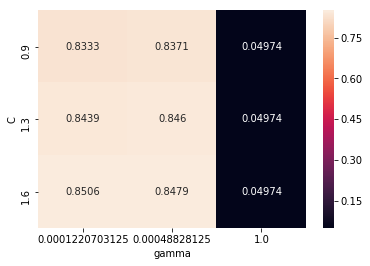

In [98]:
draw_heatmap(gs)

In [103]:
gs.best_estimator_

SVC(C=1.6, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001220703125,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [106]:
%time y_validation_predictions = gs.best_estimator_.predict(X_validation)

CPU times: user 1min, sys: 40 ms, total: 1min
Wall time: 1min


In [107]:
print(classification_report(y_validation_predictions, y_validation))

             precision    recall  f1-score   support

          1       1.00      0.97      0.99       119
          2       0.65      0.56      0.60       111
          3       0.77      0.75      0.76        96
          4       0.93      0.91      0.92        94
          5       0.84      0.84      0.84        88
          6       0.61      0.56      0.58       100
          7       0.59      0.50      0.54       107
          8       0.53      0.55      0.54        86
          9       0.82      0.82      0.82        88
         10       0.62      0.72      0.67        71
         11       0.99      0.90      0.94        94
         12       0.71      0.71      0.71        80
         13       0.90      0.94      0.92        77
         14       0.62      0.75      0.68        68
         15       0.68      0.71      0.70        79
         16       0.77      0.83      0.80        76
         17       0.90      0.92      0.91        78
         18       0.89      0.89      0.89   

#### Predict Test labels

In [104]:
# Predict the labels for the Test dataset
%time y_test_predictions = gs.best_estimator_.predict(X_test)

CPU times: user 1min 30s, sys: 36 ms, total: 1min 30s
Wall time: 1min 30s


In [105]:
# Write to file
write_predictions(y_test_predictions, 'svc-c-1_6-gamma-0_000122.csv')

In [28]:
file_path = 'simple_model_results/svm.json'
search_output = json.load(open(file_path))

In [86]:
def get_scores(search_output, score_type='mean_train_score'):
    dict1 = search_output['results'][score_type]
    sorted_dict = sorted(dict1.items(), key=lambda t: int(t[0]))
    return np.array(list(map(lambda t: t[1], sorted_dict)))

In [93]:
train_scores = get_scores(search_output, 'mean_train_score')
validation_scores = get_scores(search_output, 'mean_test_score')

## Plotting Grid Search Results

In [5]:
file_path = 'simple_model_results/svm.json'
search_output = json.load(open(file_path))

In [6]:
def create_table(grid_search_results, param1_name, param2_name, score_name='mean_train_score'):
    scores = grid_search_results[score_name]
    params = grid_search_results['params']
    param1_range = np.unique(list(grid_search_results['param_' + param1_name].values()))
    param2_range = np.unique(list(grid_search_results['param_' + param2_name].values()))
    
    table = np.zeros((len(param1_range), len(param2_range)))
    for k in params.keys():
        param1_val = params[k][param1_name]
        param2_val = params[k][param2_name]
        param1_idx = np.where(param1_range == param1_val)[0][0]
        param2_idx = np.where(param2_range == param2_val)[0][0]
        score = scores[k]
        table[param1_idx][param2_idx] = score
    return pd.DataFrame(table, index=param1_range, columns=param2_range)

In [11]:
def graph_heat_map(score_type, ax, title='None', draw_colour_bar=True):
    df = create_table(search_output['results'], 'C', 'gamma', score_type)
    sns.heatmap(df, annot=True, fmt='0.2g', ax=ax, vmin=0, vmax=1, cbar=draw_colour_bar)
    ax.set_title(title)
    ax.set_xlabel('gamma')
    ax.set_ylabel('C')
    
def graph_results():
    fig, ax = plt.subplots(1, 2, figsize=(19,7))
    graph_heat_map('mean_train_score', ax[0], title='Training Set Accuracy')
    graph_heat_map('mean_test_score', ax[1], title='Test Set Accuracy')

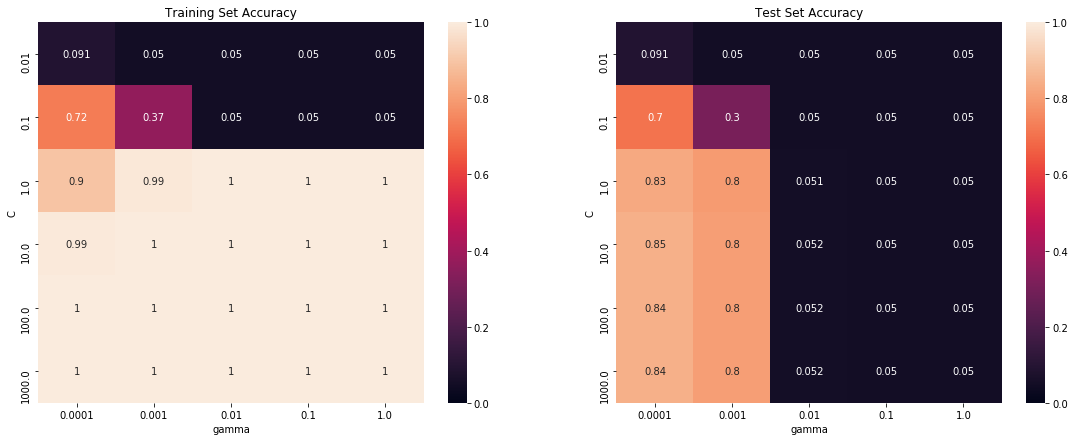

In [12]:
graph_results()

In general, adding more and more features (even if its not necessarily useful for making predictions) would improve the accuracy of the trained model. When the number of features would be equal to or greater than the number of samples used for training, then (not surprising) one would observe a high accuracy close to 100% on the training set (even under cross-validation). This is simply because of over-fitting: http://scikit-learn.org/stable/auto_examples/svm/plot_svm_anova.html

In [9]:
search_output['best_params']

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [10]:
search_output['best_score']

0.8463336614173228

On Kaggle, the accuracy on the public test data is 0.77861 using predictions C=10 and gamma=0.0001. The model is overfitting. 

The figures above indicate that the overfitting is less with an SVM model where C=1 and gamma=0.0001. Accuracy on Kaggle is 0.75606 on this model. The best parameters suggested by grid search  generalises better.